In [1]:
import pandas as pd
from sklearn import metrics
from sklearn import neighbors,svm
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import numpy as np
import lightgbm as lgb
import csv
from matplotlib import pylab as plt
%matplotlib inline








In [2]:
import operator
from scipy import sparse
from sklearn.preprocessing import PolynomialFeatures
from sklearn import cross_validation
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import math

E:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import numpy as np
from sklearn import metrics
import bisect


def get_tpr_from_fpr(fpr_array, tpr_array, target):
    fpr_index = np.where(fpr_array == target)
    assert target <= 0.01, 'the value of fpr in the custom metric function need lt 0.01'
    if len(fpr_index[0]) > 0:
        return np.mean(tpr_array[fpr_index])
    else:
        tmp_index = bisect.bisect(fpr_array, target)
        fpr_tmp_1 = fpr_array[tmp_index-1]
        fpr_tmp_2 = fpr_array[tmp_index]
        if (target - fpr_tmp_1) > (fpr_tmp_2 - target):
            tpr_index = tmp_index
        else:
            tpr_index = tmp_index - 1
        return tpr_array[tpr_index]


def eval_metric(pred, dtrain):
    labels=dtrain.get_label()
    fpr, tpr, _ = metrics.roc_curve(labels, pred, pos_label=1)
    tpr1 = get_tpr_from_fpr(fpr, tpr, 0.001)
    tpr2 = get_tpr_from_fpr(fpr, tpr, 0.005)
    tpr3 = get_tpr_from_fpr(fpr, tpr, 0.01)
    return 0.4*tpr1 + 0.3*tpr2 + 0.3*tpr3

In [4]:
from sklearn.metrics import roc_curve 
def score(pred,labels): 
    
    fpr, tpr, thresholds = roc_curve(labels, pred, pos_label=1) 
    score=0.4*tpr[np.where(fpr>=0.001)[0][0]]+0.3*tpr[np.where(fpr>=0.005)[0][0]]+0.3*tpr[np.where(fpr>=0.01)[0][0]] 
    return score 

In [5]:
from sklearn.cross_validation import train_test_split 
'''
feature=[['f235', 0.24277271063415065, 0.5], ['f236', 0.23256584227052, 0.5], ['f234', 0.21852324880065013, 0.5], ['f238', 0.20669227663973286, 0.5], ['f237', 0.20567030143383547, 0.5], ['f215', 0.18003586190466467, 0.5], ['f7', 0.162332723652273, 0.5], ['f216', 0.1446281769584835, 0.5], ['f244', 0.13892783851103804, 0.5], ['f6', 0.13032218523874226, 0.5], ['f245', 0.1224749414492881, 0.5], ['f217', 0.11778605208130105, 0.5], ['f12', 0.11220688045867938, 0.5], ['f246', 0.0944845317959146, 0.5], ['f218', 0.0841674665273542, 0.5], ['f14', 0.07648252484818509, 0.5], ['f247', 0.05870535011692454, 0.5], ['f9', 0.054703167983445544, 0.5], ['f16', 0.054399978188648404, 0.5], ['f248', 0.054396213182353534, 0.5], ['f18', 0.053377355965473015, 0.5], ['f17', 0.05277656470300024, 0.5], ['f1', 0.048323215878311024, 0.5], ['f15', 0.04512025819443611, 0.5], ['f3', 0.033334950128024, 0.5], ['f243', 0.03116194081685024, 0.5], ['f242', 0.02845729625450647, 0.5], ['f253', 0.023578334266884604, 0.5], ['f11', 0.02343224272025608, 0.5], ['f250', 0.020784032759080837, 0.5], ['f4', 0.01995060944911291, 0.5], ['f241', 0.019680611801856637, 0.5], ['f240', 0.019468833516774347, 0.5], ['f252', 0.018630984649919094, 0.5], ['date', 0.018462271194602548, 0.5], ['f214', 0.017381164702992575, 0.5], ['f162', 0.01718247917779111, 0.5], ['f212', 0.01702770092843368, 0.5], ['f164', 0.01696777187422456, 0.5], ['f227', 0.016201156360754226, 0.5], ['f229', 0.016012814148916404, 0.5], ['f165', 0.015663417987175063, 0.5], ['f13', 0.015409398433251623, 0.5], ['f161', 0.015129186060917385, 0.5], ['f211', 0.01446420022336798, 0.5], ['f228', 0.013706938616999493, 0.5], ['f163', 0.013585267001421921, 0.5], ['f224', 0.01330379020966929, 0.5], ['f226', 0.012988463102088342, 0.5], ['f231', 0.012540905076059148, 0.5], ['f213', 0.012351265640991082, 0.5], ['f249', 0.01197224276917945, 0.5], ['f251', 0.011765270724995986, 0.5], ['f222', 0.011369904891302428, 0.5], ['f225', 0.011092105556587375, 0.5], ['f223', 0.011058827795219106, 0.5], ['f19', 0.010735071769281145, 0.5], ['f230', 0.009945204861347538, 0.5], ['f233', 0.009826605087938454, 0.5], ['f220', 0.009017478325812626, 0.5], ['f232', 0.008497838661735372, 0.5], ['f221', 0.00812703778627346, 0.5], ['f239', 0.007158846304609741, 0.5], ['f219', 0.004992909680328867, 0.5], ['f8', 0.0030139124544507705, 0.5], ['f2', 0.0009461512568509897, 0.5], ['f10', 0.00011296341219061222, 0.5]]
print len(feature)
feature=[['f261', 0.33029671565601293, 0.5], ['f260', 0.3256918087259907, 0.5], ['f259', 0.31760248730956275, 0.5], ['f262', 0.3084464625689011, 0.5], ['f264', 0.3041963844158335, 0.5], ['f271', 0.30097797868208404, 0.5], ['f265', 0.28776080074474697, 0.5], ['f270', 0.28751873987998744, 0.5], ['f263', 0.2760101410146563, 0.5], ['f266', 0.2656864100408039, 0.5], ['f235', 0.24277271063415065, 0.5], ['f204', 0.23975444749788635, 0.5], ['f236', 0.23256584227052, 0.5], ['f234', 0.21852324880065013, 0.5], ['f238', 0.20669227663973286, 0.5], ['f237', 0.20567030143383547, 0.5], ['f205', 0.2012304069895149, 0.5], ['f215', 0.18003586190466467, 0.5], ['f282', 0.1778345647631083, 0.5], ['f279', 0.17615169382462614, 0.5], ['f280', 0.1735188043708116, 0.5], ['f185', 0.17310082158890924, 0.5], ['f281', 0.1719725901849352, 0.5], ['f206', 0.16597615054025133, 0.5], ['f7', 0.162332723652273, 0.5], ['f5', 0.16066140709165044, 0.5], ['f31', 0.1583523257924094, 0.5], ['f30', 0.15785399326137475, 0.5], ['f184', 0.1510030619818684, 0.5], ['f210', 0.14830258889621756, 0.5], ['f216', 0.1446281769584835, 0.5], ['f244', 0.13892783851103804, 0.5], ['f292', 0.1311460861874161, 0.5], ['f6', 0.13032218523874226, 0.5], ['f278', 0.12865228772065992, 0.5], ['f291', 0.1264473027413392, 0.5], ['f183', 0.12598696397063203, 0.5], ['f29', 0.12408179484338454, 0.5], ['f245', 0.1224749414492881, 0.5], ['f28', 0.1220907170265826, 0.5], ['f25', 0.12185396668510393, 0.5], ['f288', 0.12152580105643564, 0.5], ['f209', 0.12110033379564805, 0.5], ['f52', 0.12064809718366401, 0.5], ['f24', 0.1197759400056249, 0.5], ['f54', 0.11974081344493727, 0.5], ['f27', 0.1192798407551253, 0.5], ['f217', 0.11778605208130105, 0.5], ['f53', 0.11668843442082216, 0.5], ['f207', 0.11303679541187028, 0.5], ['f26', 0.11262715447309721, 0.5], ['f12', 0.11220688045867938, 0.5], ['f192', 0.11166904718940875, 0.5], ['f193', 0.1092406872091875, 0.5], ['f55', 0.1087055633076366, 0.5], ['f191', 0.1067978076366178, 0.5], ['f203', 0.10609258422043565, 0.5], ['f269', 0.10525709907600397, 0.5], ['f198', 0.1045569149258525, 0.5], ['f202', 0.10444031998379756, 0.5], ['f258', 0.10338940508731749, 0.5], ['f289', 0.10289505644236875, 0.5], ['f197', 0.10243162344103808, 0.5], ['f295', 0.10220539864832512, 0.5], ['f290', 0.10161837418168125, 0.5], ['f23', 0.10089432492088636, 0.5], ['f208', 0.10058490598417756, 0.5], ['f287', 0.09884119716066825, 0.5], ['f171', 0.09874667628270627, 0.5], ['f182', 0.098419310585782, 0.5], ['f178', 0.09796041655203494, 0.5], ['f268', 0.09752601717418825, 0.5], ['f257', 0.09736030804508439, 0.5], ['f190', 0.09693387713836697, 0.5], ['f22', 0.09605622955475104, 0.5], ['f294', 0.09542769202583895, 0.5], ['f170', 0.09457535190394986, 0.5], ['f246', 0.0944845317959146, 0.5], ['f196', 0.09208113618253783, 0.5], ['f201', 0.09158404905534386, 0.5], ['f189', 0.09113585104655177, 0.5], ['f177', 0.09097951095107876, 0.5], ['f286', 0.08969558539371293, 0.5], ['f179', 0.0890766360380993, 0.5], ['f169', 0.08816998455282773, 0.5], ['f256', 0.08672909892748155, 0.5], ['f267', 0.08651489624380396, 0.5], ['f188', 0.08626570375368126, 0.5], ['f176', 0.08622975453524068, 0.5], ['f200', 0.08601213036661731, 0.5], ['f195', 0.08596828454145744, 0.5], ['f273', 0.08594555855375033, 0.5], ['f255', 0.08560827586391107, 0.5], ['f187', 0.08537577215914198, 0.5], ['f284', 0.0849704005402278, 0.5], ['f172', 0.08480597782826486, 0.5], ['f168', 0.08467757206371432, 0.5], ['f167', 0.08462565393082908, 0.5], ['f194', 0.08456918314911296, 0.5], ['f272', 0.08419423166659275, 0.5], ['f218', 0.0841674665273542, 0.5], ['f181', 0.08414832314255091, 0.5], ['f254', 0.0841362830008292, 0.5], ['f293', 0.08411310228420861, 0.5], ['f186', 0.0840798291494328, 0.5], ['f173', 0.08397061597596911, 0.5], ['f199', 0.0838438164647821, 0.5], ['f175', 0.08356909486338975, 0.5], ['f166', 0.08356360691507778, 0.5], ['f180', 0.08330551611471253, 0.5], ['f285', 0.08328763621608108, 0.5], ['f174', 0.08316884989081609, 0.5], ['f297', 0.08188051564608832, 0.5], ['f14', 0.07648252484818509, 0.5], ['f51', 0.07343907774716384, 0.5], ['f296', 0.07308733141757115, 0.5], ['f283', 0.07129804694972448, 0.5], ['f35', 0.06974768656022992, 0.5], ['f56', 0.06929521322397394, 0.5], ['f50', 0.06890433397867984, 0.5], ['f33', 0.06859021740630104, 0.5], ['f49', 0.06767099677762106, 0.5], ['f21', 0.06704136907002702, 0.5], ['f20', 0.06668239556629006, 0.5], ['f32', 0.0661886579465053, 0.5], ['f48', 0.06552948858769203, 0.5], ['f34', 0.06468940708924721, 0.5], ['f57', 0.060511793143733714, 0.5], ['f247', 0.05870535011692454, 0.5], ['f9', 0.054703167983445544, 0.5], ['f16', 0.054399978188648404, 0.5], ['f248', 0.054396213182353534, 0.5], ['f58', 0.054333426469621096, 0.5], ['f18', 0.053377355965473015, 0.5], ['f17', 0.05277656470300024, 0.5], ['f1', 0.048323215878311024, 0.5], ['f277', 0.04676142945807303, 0.5], ['f15', 0.04512025819443611, 0.5], ['f276', 0.04473680791620474, 0.5], ['f274', 0.04391347975224537, 0.5], ['f63', 0.03887945500678798, 0.5], ['f275', 0.038356129695047994, 0.5], ['f3', 0.033334950128024, 0.5], ['f62', 0.03253127337319326, 0.5], ['f243', 0.03116194081685024, 0.5], ['f242', 0.02845729625450647, 0.5], ['f61', 0.0241320625546105, 0.5], ['f253', 0.023578334266884604, 0.5], ['f11', 0.02343224272025608, 0.5], ['f250', 0.020784032759080837, 0.5], ['f4', 0.01995060944911291, 0.5], ['f241', 0.019680611801856637, 0.5], ['f240', 0.019468833516774347, 0.5], ['f252', 0.018630984649919094, 0.5], ['date', 0.018462271194602548, 0.5], ['f214', 0.017381164702992575, 0.5], ['f162', 0.01718247917779111, 0.5], ['f212', 0.01702770092843368, 0.5], ['f164', 0.01696777187422456, 0.5], ['f59', 0.016726084128679188, 0.5], ['f60', 0.01641419668203693, 0.5], ['f227', 0.016201156360754226, 0.5], ['f229', 0.016012814148916404, 0.5], ['f165', 0.015663417987175063, 0.5], ['f13', 0.015409398433251623, 0.5], ['f161', 0.015129186060917385, 0.5], ['f211', 0.01446420022336798, 0.5], ['f228', 0.013706938616999493, 0.5], ['f163', 0.013585267001421921, 0.5], ['f224', 0.01330379020966929, 0.5], ['f226', 0.012988463102088342, 0.5], ['f231', 0.012540905076059148, 0.5], ['f213', 0.012351265640991082, 0.5], ['f249', 0.01197224276917945, 0.5], ['f251', 0.011765270724995986, 0.5], ['f222', 0.011369904891302428, 0.5], ['f225', 0.011092105556587375, 0.5], ['f223', 0.011058827795219106, 0.5], ['f19', 0.010735071769281145, 0.5], ['f230', 0.009945204861347538, 0.5], ['f233', 0.009826605087938454, 0.5], ['f220', 0.009017478325812626, 0.5], ['f232', 0.008497838661735372, 0.5], ['f221', 0.00812703778627346, 0.5], ['f239', 0.007158846304609741, 0.5], ['f219', 0.004992909680328867, 0.5], ['f8', 0.0030139124544507705, 0.5], ['f2', 0.0009461512568509897, 0.5], ['f10', 0.00011296341219061222, 0.5]]
print len(feature)
s=map(lambda x:x[0],feature)[0:55]
'''
#去掉date
s=['d', 'f7', 'f238', 'f248', 'f210', 'f6', 'f234', 'f82', 'f215', 'f244', 'f237', 'f253', 'f235', 'f236', 'f218', 'f245', 'f85', 'f15', 'f247', 'f243', 'f209', 'f84', 'f86', 'f14', 'f216', 'f18', 'f106', 'f252', 'f242', 'f246', 'f17', 'f5', 'f262', 'f208', 'f83', 'f207', 'f4', 'f30', 'f263', 'f222', 'f217', 'f81', 'f34', 'f204', 'f19', 'f52', 'f266', 'f241', 'f230', 'f220', 'f164', 'f240', 'f225', 'f29', 'f105', 'f31', 'f28', 'f5_0', 'f101', 'f205', 'y', 'f233', 'f27', 'f259', 'f25', 'f229', 'f53', 'f33', 'f232', 'f11', 'f260', 'f58', 'f261', 'f54', 'f249', 'f250', 'f231', 'f104', 'f48', 'f226', 'f239', 'f265', 'f185', 'f251', 'f55', 'f214', 'f57', 'f49', 'f50', 'f100', 'f279', 'f206', 'f223', 'f26', 'f221', 'f80', 'f51', 'f63', 'f56', 'f175', 'f192', 'f163', 'f23', 'f161', 'f184', 'f35', 'f219', 'f282', 'f284', 'f287', 'f32', 'f224', 'f162', 'f9', 'f16', 'f227', 'f290', 'f278', 'f264', 'f213', 'f13', 'f8', 'f1', 'f271', 'f79', 'f291', 'f270', 'f91', 'f286', 'f97', 'f24', 'f165', 'f12', 'f212', 'f99', 'f75', 'f21', 'f22', 'f297', 'f110', 'f211', 'f228', 'f289', 'f5_2', 'f103', 'f183', 'f62', 'f174', 'f283', 'f3', 'f10', 'f182', 'f281', 'f178', 'f285', 'f296', 'f78', 'f64', 'f294', 'f95', 'f257', 'f76', 'f102', 'f132', 'f181', 'f96', 'f142', 'f128', 'f77', 'f275', 'f179', 'f177', 'f98', 'f90', 'f20', 'f134', 'f73', 'f180', 'f280', 'f2', 'f176', 'f126', 'f202', 'f295', 'f274', 'f191', 'f109', 'f113', 'f256', 'f277', 'f276', 'f66', 'f93', 'f293', 'f193', 'f143', 'f166', 'f146', 'f70', 'f87', 'f167', 'f124', 'f154', 'f148', 'f61', 'f133', 'f71', 'f292', 'f74', 'f107', 'f89', 'f127', 'f197', 'f171', 'f140', 'f198', 'f131', 'f108', 'f130', 'f151', 'f144', 'f258', 'f268', 'f72', 'f67', 'f5_4', 'f129', 'f145', 'f190', 'f196', 'f189', 'f288', 'f273', 'f92', 'f65', 'f254', 'f200', 'f187', 'f203', 'f199', 'f94', 'f116', 'f188', 'f59', 'f125', 'f139', 'f172', 'f173', 'f60', 'f255', 'f269', 'f88', 'f68', 'f168', 'f272', 'f120', 'f170', 'f195', 'f40', 'f122', 'f267', 'f141', 'f136', 'f123', 'f150', 'f159', 'f186', 'f155', 'f157', 'f137', 'f112', 'f156', 'f158', 'f5_1', 'f201', 'f117', 'f147', 'f160', 'f118', 'f115', 'f138', 'f169', 'f152', 'f121', 'f119', 'f69', 'f39', 'f194', 'f149', 'f111', 'f135', 'f153', 'f114', 'f46', 'f45', 'f42', 'f44', 'f47', 'f43', 'f38', 'f5_5', 'f41', 'f37', 'f36']
#s=['f5_0', 'f5_1','f5_2','f5_3','f5_4','f5_5','d', 'f7', 'f248', 'f238', 'f6', 'f237', 'f234', 'f215', 'f210', 'f236', 'f244', 'f247', 'f253', 'f218', 'f243', 'f245', 'f235', 'f246', 'f15', 'f5', 'f17', 'f82', 'f217', 'f216', 'f14', 'f18', 'f19', 'f252', 'f242', 'f4', 'f209', 'f164', 'f85', 'f106', 'f222', 'f84', 'f230', 'f241', 'f226', 'f220', 'f86', 'f11', 'f233', 'f240', 'f250', 'f249', 'f225', 'f204', 'f221', 'f224', 'f231', 'f214', 'f232', 'f239', 'f207', 'f223', 'f262', 'f266', 'f162', 'f208', 'f163', 'f229', 'f83', 'f263', 'f251', 'f81', 'f212', 'f228', 'f219', 'f227', 'f213', 'f101', 'f161', 'f8', 'f165', 'f34', 'f211', 'f30', 'f9', 'f31', 'f1', 'f13', 'f52', 'f260', 'f259', 'f205', 'f12', 'f3', 'f33', 'f58', 'f53', 'f206', 'f105', 'f265', 'f261', 'f57', 'f16', 'f270', 'f48', 'f279', 'f29', 'f264', 'f10', 'f80', 'f28', 'f291', 'f50', 'f55', 'f25', 'f26', 'f49', 'f290', 'f51', 'f54', 'f2', 'f35', 'f271', 'f63', 'f27', 'f284', 'f278', 'f184', 'f185', 'f100', 'f282', 'f32', 'y', 'f297', 'f289', 'f283', 'f103', 'f174', 'f79', 'f287', 'f56', 'f23', 'f192', 'f104', 'f285', 'f183', 'f22', 'f281', 'f99', 'f175', 'f296', 'f24', 'f181', 'f21', 'm', 'f286', 'f182', 'f75', 'f193', 'f62', 'f295', 'f73', 'f191', 'f178', 'f102', 'f91', 'f293', 'f78', 'f294', 'f97', 'f110', 'f76', 'f277', 'f275', 'f180', 'f177', 'f189', 'f77', 'f280', 'f134', 'f274', 'f90', 'f93', 'f142', 'f168', 'f257', 'f113', 'f179', 'f87', 'f143', 'f187', 'f276', 'f195', 'f199', 'f66', 'f254', 'f166', 'f107', 'f95', 'f70', 'f132', 'f202', 'f109', 'f20', 'f130', 'f128', 'f203', 'f292', 'f61', 'f288', 'f176', 'f171', 'f273', 'f197', 'f172', 'f255', 'f167', 'f96', 'f72', 'f256', 'f196', 'f151', 'f98', 'f89', 'f127', 'f173', 'f71', 'f64', 'f65', 'f201', 'f170', 'f74', 'f148', 'f140', 'f200', 'f124', 'f88', 'f144', 'f67', 'f188', 'f133', 'f198', 'f186', 'f146', 'f190', 'f126', 'f145', 'f267', 'f258', 'f268', 'f269', 'f131', 'f154', 'f108', 'f40', 'f125', 'f60', 'f169', 'f94', 'f129', 'f194', 'f112', 'f147', 'f120', 'f59', 'f139', 'f158', 'f68', 'f119', 'f92', 'f155', 'f159', 'f116', 'f141', 'f114', 'f123', 'f156', 'f136', 'f272', 'f117', 'f138', 'f121', 'f160', 'f118', 'f122', 'f69', 'f137', 'f149', 'f111', 'f150', 'f152', 'f42', 'f157', 'f115', 'f135', 'f153', 'f39', 'f45', 'f47', 'f36', 'f46', 'f38', 'f41', 'f43', 'f44', 'f37']
#s=[ 'y','m','d','f18', 'f17', 'f16', 'f15', 'f14', 'f13', 'f12', 'f11', 'f10', 'f9', 'f19', 'f7', 'f6', 'f4', 'f3', 'f2', 'f1', 'date', 'f8', 'f239', 'f238', 'f237', 'f233', 'f235', 'f234', 'f240', 'f232', 'f236', 'f241', 'f245', 'f243', 'f244', 'f246', 'f247', 'f248', 'f249', 'f250', 'f231', 'f251', 'f162', 'f230', 'f220', 'f228', 'f163', 'f164', 'f165', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f229', 'f217', 'f219', 'f252', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f218', 'f253', 'f242', 'f161', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f188', 'f255', 'f187', 'f185', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f186', 'f209', 'f254', 'f273', 'f210', 'f272', 'f271', 'f270', 'f269', 'f268', 'f267', 'f266', 'f274', 'f265', 'f263', 'f262', 'f261', 'f260', 'f259', 'f258', 'f257', 'f256', 'f264', 'f275', 'f208', 'f277', 'f276', 'f20', 'f21', 'f23', 'f53', 'f52', 'f22', 'f283', 'f295', 'f278', 'f279', 'f280', 'f294', 'f293', 'f292', 'f291', 'f290', 'f289', 'f288', 'f281', 'f286', 'f285', 'f282', 'f284', 'f287', 'f297', 'f24', 'f25', 'f26', 'f27', 'f296', 'f5', 'f56', 'f55', 'f57', 'f58', 'f61', 'f60', 'f54', 'f62', 'f63', 'f59', 'f51', 'f49', 'f48', 'f50', 'f35', 'f34', 'f33', 'f32', 'f31', 'f30', 'f29', 'f28', 'f89', 'f85', 'f86', 'f87', 'f88', 'f90', 'f91', 'f93', 'f94', 'f95', 'f96', 'f97', 'f84', 'f92', 'f83', 'f64', 'f81', 'f80', 'f79', 'f78', 'f77', 'f76', 'f71', 'f70', 'f69', 'f68', 'f67', 'f66', 'f65', 'f98', 'f82', 'f99', 'f147', 'f101', 'f128', 'f129', 'f130', 'f131', 'f132', 'f100', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f127', 'f140', 'f142', 'f143', 'f144', 'f145', 'f146', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f141', 'f126', 'f133', 'f124', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f118', 'f119', 'f117', 'f121', 'f122', 'f123', 'f120', 'f125', 'f109', 'f155', 'f156', 'f157', 'f158', 'f107', 'f160', 'f108', 'f159', 'f110', 'f72', 'f73', 'f74', 'f75', 'f102', 'f103', 'f104', 'f105', 'f106', 'f42', 'f47', 'f46', 'f45', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f43', 'f44']
#s=['f210', 'f67', 'f68', 'f66', 'f69', 'f70', 'f154', 'f71', 'f120', 'f121', 'f152', 'f114', 'f113', 'f115', 'f151', 'f122', 'f153', 'f118', 'f116', 'f149', 'f117', 'f111', 'f119', 'f150', 'f112', 'f288', 'f289', 'f148', 'f290', 'f142', 'f143', 'f292', 'f106', 'f280', 'f281', 'f282', 'f64', 'f75', 'f73', 'f293', 'f294', 'f295', 'f279', 'f209', 'f144', 'f145', 'f297', 'f146', 'f130', 'f147', 'f110', 'f105', 'f287', 'f286', 'f285', 'f284', 'f134']
print (len(s))
#s=s[0:70]
print (len(s))
print ("load train")
trainData= pd.read_csv('small_train.csv',header=0)
trainData=trainData[trainData.label!=-1]
#print ("load test")
#testData = pd.read_csv('test_set_b_0.csv',header=0)
trainData['y']=trainData['date']//1000
trainData['m']=trainData['date']//100%100
trainData['d']=trainData['date']%100
trainData['f5_0']=trainData['f5']%10
trainData['f5_1']=trainData['f5']//10%10
trainData['f5_2']=trainData['f5']//100%10
trainData['f5_3']=trainData['f5']//1000%10
trainData['f5_4']=trainData['f5']//10000%10
trainData['f5_5']=trainData['f5']//100000
trainData=trainData.sort_values(by='date')
trainData=trainData.fillna(-1)
#trainData=trainData.loc[:,s].fillna(-1)

#testData=testData.fillna(0)

#test_x=np.array(testData.loc[:,s])
#train_x=trainData.loc[:,s]
#train_y=trainData.loc[:,'label']



306
306
load train


In [6]:
#trainData.head(15)

In [7]:
#

In [8]:
#eval_X.head(-1)

In [9]:
rate=0.5


train_X=trainData.loc[:int(trainData.shape[0]*rate),:]
eval_X0=trainData.loc[int(trainData.shape[0]*rate):,:]
train_Y=train_X.label
del train_X['label']
eval_Y0=eval_X0.label
del eval_X0['label']
train_X1,eval_X,train_Y1,eval_Y = train_test_split(eval_X0,eval_Y0,test_size=0.5,random_state=0)
del eval_X0,eval_Y0
train_X,train_Y=train_X.append(train_X1),train_Y.append(train_Y1)
train_X=train_X.loc[:,s]
eval_X=eval_X.loc[:,s]
params = {'booster': 'gbtree',
              #'objective': 'multi:softmax',
              'objective': 'binary:logistic',
              'eval_metric': ['logloss','auc'],
              'gamma': 1,
              'min_child_weight': 1.5,
              'max_depth': 5,
              'lambda': 10,
              'subsample': 0.7,
              'colsample_bytree': 0.7,
              'colsample_bylevel': 0.7,
              'eta': 0.03,
              'tree_method': 'exact',
              'seed': 2017,
              'nthread': 12,
              }


plst = list(params.items())



xgb_train = xgb.DMatrix(train_X, label=train_Y,missing=-1)
xgb_val = xgb.DMatrix(eval_X,label=eval_Y,missing=-1)


# return 训练和验证的错误率
watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]

print ("xgb.train")
# training model 
# early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
model = xgb.train(params, xgb_train,num_boost_round=10000,evals=watchlist,early_stopping_rounds=50)
'''
for i in range(len(preds_list)):
    if i==0:
        pre=preds_list[i]
        pre_v=model_list[i].predict(z,ntree_limit=model.best_iteration)
    else:
        pre=np.concatenate((pre,preds_list[i]),axis=0)
        pre_v=(pre_v+model_list[i].predict(z,ntree_limit=model.best_iteration))

pre_v=pre_v/len(preds_list)

loss_mean=np.mean(cv_scores)
print (loss_mean)
with open("result.txt", "a") as f:
    f.write(str(loss_mean) + "\n")

result=pre_v
out_df = pd.DataFrame(result)
out_df.columns = ["high", "medium", "low"]
out_df["listing_id"] = v.listing_id.values
out_df.to_csv("xgb_cv10_%s.csv" % str(loss_mean), index=False)


'''

xgb.train
[0]	train-logloss:0.668795	train-auc:0.937508	val-logloss:0.668513	val-auc:0.945729
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[1]	train-logloss:0.646061	train-auc:0.95496	val-logloss:0.645695	val-auc:0.960828
[2]	train-logloss:0.624154	train-auc:0.958032	val-logloss:0.623648	val-auc:0.962786
[3]	train-logloss:0.604074	train-auc:0.960618	val-logloss:0.603528	val-auc:0.966294
[4]	train-logloss:0.584734	train-auc:0.961493	val-logloss:0.584053	val-auc:0.96685
[5]	train-logloss:0.566273	train-auc:0.961327	val-logloss:0.565453	val-auc:0.966596
[6]	train-logloss:0.548658	train-auc:0.96307	val-logloss:0.547665	val-auc:0.969097
[7]	train-logloss:0.531668	train-auc:0.963562	val-logloss:0.530598	val-auc:0.969749
[8]	train-logloss:0.515973	train-auc:0.969951	val-logloss:0.514993	val-auc:0.972221
[9]	train-logloss:0.500665	train-auc:0.969992	val-logloss:0.499511	val-auc:0.972324
[10]	train-log

[96]	train-logloss:0.123055	train-auc:0.982634	val-logloss:0.124682	val-auc:0.981506
[97]	train-logloss:0.122212	train-auc:0.982818	val-logloss:0.123914	val-auc:0.981725
[98]	train-logloss:0.121319	train-auc:0.982885	val-logloss:0.12313	val-auc:0.981744
[99]	train-logloss:0.120468	train-auc:0.982953	val-logloss:0.122398	val-auc:0.98177
[100]	train-logloss:0.11969	train-auc:0.983022	val-logloss:0.121707	val-auc:0.981808
[101]	train-logloss:0.118936	train-auc:0.983149	val-logloss:0.121014	val-auc:0.981836
[102]	train-logloss:0.118179	train-auc:0.983205	val-logloss:0.120357	val-auc:0.98186
[103]	train-logloss:0.117394	train-auc:0.983315	val-logloss:0.119589	val-auc:0.981976
[104]	train-logloss:0.116593	train-auc:0.983393	val-logloss:0.118802	val-auc:0.982048
[105]	train-logloss:0.115882	train-auc:0.983454	val-logloss:0.118148	val-auc:0.982081
[106]	train-logloss:0.115215	train-auc:0.983508	val-logloss:0.117571	val-auc:0.982106
[107]	train-logloss:0.114507	train-auc:0.983556	val-logloss:0.

[192]	train-logloss:0.088645	train-auc:0.987851	val-logloss:0.094619	val-auc:0.9853
[193]	train-logloss:0.088524	train-auc:0.987864	val-logloss:0.094549	val-auc:0.985302
[194]	train-logloss:0.088351	train-auc:0.987888	val-logloss:0.094461	val-auc:0.985307
[195]	train-logloss:0.08819	train-auc:0.987921	val-logloss:0.09438	val-auc:0.985307
[196]	train-logloss:0.088086	train-auc:0.987938	val-logloss:0.094296	val-auc:0.985318
[197]	train-logloss:0.08794	train-auc:0.987975	val-logloss:0.094182	val-auc:0.985345
[198]	train-logloss:0.087802	train-auc:0.98801	val-logloss:0.094054	val-auc:0.985371
[199]	train-logloss:0.087683	train-auc:0.988025	val-logloss:0.093987	val-auc:0.985381
[200]	train-logloss:0.08751	train-auc:0.988056	val-logloss:0.093824	val-auc:0.985426
[201]	train-logloss:0.087401	train-auc:0.988072	val-logloss:0.093746	val-auc:0.985446
[202]	train-logloss:0.087284	train-auc:0.988105	val-logloss:0.093652	val-auc:0.985464
[203]	train-logloss:0.087139	train-auc:0.98814	val-logloss:0.

[288]	train-logloss:0.079489	train-auc:0.989958	val-logloss:0.089006	val-auc:0.986401
[289]	train-logloss:0.079419	train-auc:0.989977	val-logloss:0.088975	val-auc:0.986409
[290]	train-logloss:0.07937	train-auc:0.989992	val-logloss:0.088955	val-auc:0.98642
[291]	train-logloss:0.079305	train-auc:0.990008	val-logloss:0.088918	val-auc:0.98642
[292]	train-logloss:0.079194	train-auc:0.990045	val-logloss:0.088851	val-auc:0.98644
[293]	train-logloss:0.079152	train-auc:0.990051	val-logloss:0.088817	val-auc:0.986446
[294]	train-logloss:0.079092	train-auc:0.990066	val-logloss:0.088778	val-auc:0.986457
[295]	train-logloss:0.079045	train-auc:0.990078	val-logloss:0.088753	val-auc:0.986461
[296]	train-logloss:0.078981	train-auc:0.990091	val-logloss:0.088735	val-auc:0.98646
[297]	train-logloss:0.07894	train-auc:0.990101	val-logloss:0.088714	val-auc:0.986469
[298]	train-logloss:0.078873	train-auc:0.990118	val-logloss:0.088689	val-auc:0.986469
[299]	train-logloss:0.078834	train-auc:0.990129	val-logloss:

[384]	train-logloss:0.074029	train-auc:0.991348	val-logloss:0.086203	val-auc:0.9871
[385]	train-logloss:0.073954	train-auc:0.99137	val-logloss:0.086137	val-auc:0.987119
[386]	train-logloss:0.073911	train-auc:0.99138	val-logloss:0.086125	val-auc:0.987117
[387]	train-logloss:0.073865	train-auc:0.991392	val-logloss:0.086109	val-auc:0.987121
[388]	train-logloss:0.07382	train-auc:0.991405	val-logloss:0.086098	val-auc:0.987118
[389]	train-logloss:0.07379	train-auc:0.991412	val-logloss:0.086079	val-auc:0.987122
[390]	train-logloss:0.073729	train-auc:0.991424	val-logloss:0.086037	val-auc:0.987134
[391]	train-logloss:0.073684	train-auc:0.991436	val-logloss:0.086024	val-auc:0.987137
[392]	train-logloss:0.073655	train-auc:0.991443	val-logloss:0.086016	val-auc:0.98714
[393]	train-logloss:0.07361	train-auc:0.991454	val-logloss:0.085996	val-auc:0.987147
[394]	train-logloss:0.073562	train-auc:0.991469	val-logloss:0.085976	val-auc:0.987158
[395]	train-logloss:0.073507	train-auc:0.991485	val-logloss:0.

[480]	train-logloss:0.070043	train-auc:0.992369	val-logloss:0.084645	val-auc:0.987538
[481]	train-logloss:0.070004	train-auc:0.992379	val-logloss:0.084634	val-auc:0.987542
[482]	train-logloss:0.069964	train-auc:0.992389	val-logloss:0.084609	val-auc:0.98755
[483]	train-logloss:0.069935	train-auc:0.992396	val-logloss:0.08461	val-auc:0.987549
[484]	train-logloss:0.069881	train-auc:0.99241	val-logloss:0.084582	val-auc:0.987556
[485]	train-logloss:0.069827	train-auc:0.992425	val-logloss:0.084578	val-auc:0.987553
[486]	train-logloss:0.069814	train-auc:0.992427	val-logloss:0.084575	val-auc:0.987554
[487]	train-logloss:0.069771	train-auc:0.992439	val-logloss:0.084561	val-auc:0.987561
[488]	train-logloss:0.069696	train-auc:0.992455	val-logloss:0.084518	val-auc:0.987575
[489]	train-logloss:0.069649	train-auc:0.992467	val-logloss:0.084493	val-auc:0.987581
[490]	train-logloss:0.069578	train-auc:0.992489	val-logloss:0.084446	val-auc:0.987595
[491]	train-logloss:0.069523	train-auc:0.992503	val-loglo

[576]	train-logloss:0.066255	train-auc:0.993336	val-logloss:0.083245	val-auc:0.9879
[577]	train-logloss:0.066229	train-auc:0.993341	val-logloss:0.083248	val-auc:0.987899
[578]	train-logloss:0.066198	train-auc:0.993349	val-logloss:0.083246	val-auc:0.987897
[579]	train-logloss:0.06617	train-auc:0.993354	val-logloss:0.083226	val-auc:0.987905
[580]	train-logloss:0.066145	train-auc:0.993361	val-logloss:0.083223	val-auc:0.987904
[581]	train-logloss:0.066119	train-auc:0.993365	val-logloss:0.083207	val-auc:0.987909
[582]	train-logloss:0.066088	train-auc:0.993372	val-logloss:0.08319	val-auc:0.987914
[583]	train-logloss:0.066065	train-auc:0.993377	val-logloss:0.083194	val-auc:0.987914
[584]	train-logloss:0.066017	train-auc:0.99339	val-logloss:0.08319	val-auc:0.987915
[585]	train-logloss:0.065955	train-auc:0.993403	val-logloss:0.083151	val-auc:0.987925
[586]	train-logloss:0.065928	train-auc:0.993411	val-logloss:0.083148	val-auc:0.987926
[587]	train-logloss:0.065872	train-auc:0.993423	val-logloss:

[672]	train-logloss:0.063155	train-auc:0.994074	val-logloss:0.08241	val-auc:0.988112
[673]	train-logloss:0.063136	train-auc:0.994078	val-logloss:0.082411	val-auc:0.98811
[674]	train-logloss:0.063096	train-auc:0.994089	val-logloss:0.082384	val-auc:0.988116
[675]	train-logloss:0.063059	train-auc:0.994095	val-logloss:0.082376	val-auc:0.98812
[676]	train-logloss:0.063032	train-auc:0.994102	val-logloss:0.082372	val-auc:0.988122
[677]	train-logloss:0.063011	train-auc:0.994106	val-logloss:0.082368	val-auc:0.988123
[678]	train-logloss:0.062963	train-auc:0.994113	val-logloss:0.082376	val-auc:0.988119
[679]	train-logloss:0.062936	train-auc:0.994121	val-logloss:0.082383	val-auc:0.988117
[680]	train-logloss:0.062916	train-auc:0.994126	val-logloss:0.082381	val-auc:0.988118
[681]	train-logloss:0.062899	train-auc:0.994129	val-logloss:0.082376	val-auc:0.988121
[682]	train-logloss:0.06285	train-auc:0.994138	val-logloss:0.082343	val-auc:0.988127
[683]	train-logloss:0.062808	train-auc:0.994147	val-loglos

[768]	train-logloss:0.060315	train-auc:0.994702	val-logloss:0.081401	val-auc:0.988392
[769]	train-logloss:0.060297	train-auc:0.994707	val-logloss:0.081402	val-auc:0.988393
[770]	train-logloss:0.060265	train-auc:0.994714	val-logloss:0.081396	val-auc:0.988392
[771]	train-logloss:0.060248	train-auc:0.994718	val-logloss:0.081391	val-auc:0.988395
[772]	train-logloss:0.060235	train-auc:0.994721	val-logloss:0.081387	val-auc:0.988397
[773]	train-logloss:0.060215	train-auc:0.994725	val-logloss:0.081388	val-auc:0.988394
[774]	train-logloss:0.060195	train-auc:0.994727	val-logloss:0.081389	val-auc:0.988397
[775]	train-logloss:0.060176	train-auc:0.994732	val-logloss:0.081396	val-auc:0.988392
[776]	train-logloss:0.060158	train-auc:0.994737	val-logloss:0.081391	val-auc:0.988393
[777]	train-logloss:0.060131	train-auc:0.994744	val-logloss:0.081388	val-auc:0.988395
[778]	train-logloss:0.06012	train-auc:0.994747	val-logloss:0.081384	val-auc:0.988396
[779]	train-logloss:0.060103	train-auc:0.994752	val-log

[864]	train-logloss:0.057854	train-auc:0.99524	val-logloss:0.080678	val-auc:0.988587
[865]	train-logloss:0.057831	train-auc:0.995245	val-logloss:0.080674	val-auc:0.988587
[866]	train-logloss:0.057815	train-auc:0.995248	val-logloss:0.080673	val-auc:0.988589
[867]	train-logloss:0.05779	train-auc:0.995254	val-logloss:0.080676	val-auc:0.988587
[868]	train-logloss:0.057773	train-auc:0.995256	val-logloss:0.080667	val-auc:0.98859
[869]	train-logloss:0.057761	train-auc:0.995258	val-logloss:0.080662	val-auc:0.988591
[870]	train-logloss:0.057742	train-auc:0.995261	val-logloss:0.080663	val-auc:0.98859
[871]	train-logloss:0.057722	train-auc:0.995265	val-logloss:0.080646	val-auc:0.988593
[872]	train-logloss:0.057685	train-auc:0.995274	val-logloss:0.08064	val-auc:0.988593
[873]	train-logloss:0.05767	train-auc:0.995278	val-logloss:0.080635	val-auc:0.988597
[874]	train-logloss:0.057618	train-auc:0.99529	val-logloss:0.080589	val-auc:0.988612
[875]	train-logloss:0.057599	train-auc:0.995293	val-logloss:0

[960]	train-logloss:0.05551	train-auc:0.995715	val-logloss:0.080118	val-auc:0.988731
[961]	train-logloss:0.05549	train-auc:0.995718	val-logloss:0.080114	val-auc:0.988735
[962]	train-logloss:0.055475	train-auc:0.995722	val-logloss:0.080113	val-auc:0.988737
[963]	train-logloss:0.055443	train-auc:0.995727	val-logloss:0.080112	val-auc:0.988735
[964]	train-logloss:0.055415	train-auc:0.995733	val-logloss:0.080106	val-auc:0.988738
[965]	train-logloss:0.055387	train-auc:0.995737	val-logloss:0.080088	val-auc:0.988741
[966]	train-logloss:0.055362	train-auc:0.995742	val-logloss:0.080101	val-auc:0.988742
[967]	train-logloss:0.055348	train-auc:0.995745	val-logloss:0.080108	val-auc:0.988741
[968]	train-logloss:0.055328	train-auc:0.995749	val-logloss:0.080101	val-auc:0.988743
[969]	train-logloss:0.055309	train-auc:0.995753	val-logloss:0.080102	val-auc:0.988741
[970]	train-logloss:0.055282	train-auc:0.995758	val-logloss:0.080089	val-auc:0.988745
[971]	train-logloss:0.055246	train-auc:0.995764	val-logl

[1056]	train-logloss:0.053453	train-auc:0.996093	val-logloss:0.079657	val-auc:0.988869
[1057]	train-logloss:0.053439	train-auc:0.996096	val-logloss:0.079651	val-auc:0.988871
[1058]	train-logloss:0.053423	train-auc:0.996099	val-logloss:0.079651	val-auc:0.98887
[1059]	train-logloss:0.053412	train-auc:0.9961	val-logloss:0.079647	val-auc:0.98887
[1060]	train-logloss:0.053398	train-auc:0.996103	val-logloss:0.079653	val-auc:0.988865
[1061]	train-logloss:0.053375	train-auc:0.996106	val-logloss:0.079656	val-auc:0.988864
[1062]	train-logloss:0.053359	train-auc:0.996108	val-logloss:0.079653	val-auc:0.988865
[1063]	train-logloss:0.053344	train-auc:0.996111	val-logloss:0.079649	val-auc:0.988866
[1064]	train-logloss:0.053325	train-auc:0.996115	val-logloss:0.079648	val-auc:0.988866
[1065]	train-logloss:0.053293	train-auc:0.996119	val-logloss:0.079637	val-auc:0.988871
[1066]	train-logloss:0.053273	train-auc:0.996122	val-logloss:0.079645	val-auc:0.988867
[1067]	train-logloss:0.053256	train-auc:0.99612

[1151]	train-logloss:0.051493	train-auc:0.996451	val-logloss:0.079367	val-auc:0.988943
[1152]	train-logloss:0.051475	train-auc:0.996454	val-logloss:0.079372	val-auc:0.988943
[1153]	train-logloss:0.05146	train-auc:0.996458	val-logloss:0.079374	val-auc:0.988942
[1154]	train-logloss:0.051437	train-auc:0.996461	val-logloss:0.079368	val-auc:0.988943
[1155]	train-logloss:0.05141	train-auc:0.996466	val-logloss:0.079373	val-auc:0.988941
[1156]	train-logloss:0.051388	train-auc:0.996469	val-logloss:0.079374	val-auc:0.98894
[1157]	train-logloss:0.051364	train-auc:0.996475	val-logloss:0.079359	val-auc:0.988946
[1158]	train-logloss:0.051353	train-auc:0.996477	val-logloss:0.07936	val-auc:0.988947
[1159]	train-logloss:0.051331	train-auc:0.996481	val-logloss:0.079366	val-auc:0.988945
[1160]	train-logloss:0.05132	train-auc:0.996483	val-logloss:0.079364	val-auc:0.988947
[1161]	train-logloss:0.051305	train-auc:0.996485	val-logloss:0.079361	val-auc:0.988945
[1162]	train-logloss:0.051296	train-auc:0.996487

[1246]	train-logloss:0.049606	train-auc:0.996773	val-logloss:0.078886	val-auc:0.989081
[1247]	train-logloss:0.049582	train-auc:0.996778	val-logloss:0.078882	val-auc:0.989081
[1248]	train-logloss:0.049567	train-auc:0.996781	val-logloss:0.078873	val-auc:0.989085
[1249]	train-logloss:0.049553	train-auc:0.996783	val-logloss:0.078868	val-auc:0.989084
[1250]	train-logloss:0.049532	train-auc:0.996786	val-logloss:0.078862	val-auc:0.989087
[1251]	train-logloss:0.049511	train-auc:0.996789	val-logloss:0.078862	val-auc:0.989087
[1252]	train-logloss:0.049501	train-auc:0.996791	val-logloss:0.078852	val-auc:0.98909
[1253]	train-logloss:0.049478	train-auc:0.996795	val-logloss:0.078845	val-auc:0.989092
[1254]	train-logloss:0.04946	train-auc:0.996798	val-logloss:0.078846	val-auc:0.989091
[1255]	train-logloss:0.049445	train-auc:0.996799	val-logloss:0.078856	val-auc:0.989088
[1256]	train-logloss:0.049413	train-auc:0.996804	val-logloss:0.078848	val-auc:0.989092
[1257]	train-logloss:0.049394	train-auc:0.996

[1341]	train-logloss:0.048053	train-auc:0.997017	val-logloss:0.07873	val-auc:0.989131
[1342]	train-logloss:0.048032	train-auc:0.99702	val-logloss:0.07874	val-auc:0.98913
[1343]	train-logloss:0.048021	train-auc:0.997022	val-logloss:0.078735	val-auc:0.989131
[1344]	train-logloss:0.048008	train-auc:0.997023	val-logloss:0.078742	val-auc:0.98913
[1345]	train-logloss:0.047975	train-auc:0.997029	val-logloss:0.078711	val-auc:0.989138
[1346]	train-logloss:0.04795	train-auc:0.997032	val-logloss:0.07871	val-auc:0.989141
[1347]	train-logloss:0.047935	train-auc:0.997033	val-logloss:0.078718	val-auc:0.989141
[1348]	train-logloss:0.047927	train-auc:0.997034	val-logloss:0.078714	val-auc:0.98914
[1349]	train-logloss:0.04791	train-auc:0.997036	val-logloss:0.078718	val-auc:0.989138
[1350]	train-logloss:0.047892	train-auc:0.99704	val-logloss:0.078724	val-auc:0.989137
[1351]	train-logloss:0.047864	train-auc:0.997045	val-logloss:0.078721	val-auc:0.989137
[1352]	train-logloss:0.047833	train-auc:0.99705	val-l

[1436]	train-logloss:0.046528	train-auc:0.997253	val-logloss:0.078431	val-auc:0.989223
[1437]	train-logloss:0.046514	train-auc:0.997256	val-logloss:0.078425	val-auc:0.989226
[1438]	train-logloss:0.0465	train-auc:0.997258	val-logloss:0.078426	val-auc:0.989225
[1439]	train-logloss:0.04649	train-auc:0.997259	val-logloss:0.07843	val-auc:0.989222
[1440]	train-logloss:0.046476	train-auc:0.997261	val-logloss:0.078432	val-auc:0.989222
[1441]	train-logloss:0.04647	train-auc:0.997261	val-logloss:0.078434	val-auc:0.989219
[1442]	train-logloss:0.04645	train-auc:0.997264	val-logloss:0.078426	val-auc:0.989222
[1443]	train-logloss:0.046442	train-auc:0.997266	val-logloss:0.078428	val-auc:0.989222
[1444]	train-logloss:0.046416	train-auc:0.99727	val-logloss:0.078427	val-auc:0.989222
[1445]	train-logloss:0.046404	train-auc:0.997271	val-logloss:0.078432	val-auc:0.989219
[1446]	train-logloss:0.046394	train-auc:0.997273	val-logloss:0.078434	val-auc:0.989219
[1447]	train-logloss:0.046383	train-auc:0.997275	v

[1531]	train-logloss:0.04493	train-auc:0.997497	val-logloss:0.078214	val-auc:0.989274
[1532]	train-logloss:0.044914	train-auc:0.9975	val-logloss:0.078208	val-auc:0.989275
[1533]	train-logloss:0.044901	train-auc:0.997503	val-logloss:0.078205	val-auc:0.989276
[1534]	train-logloss:0.04489	train-auc:0.997504	val-logloss:0.078206	val-auc:0.989273
[1535]	train-logloss:0.044861	train-auc:0.99751	val-logloss:0.078194	val-auc:0.989276
[1536]	train-logloss:0.044844	train-auc:0.997513	val-logloss:0.078189	val-auc:0.989277
[1537]	train-logloss:0.04483	train-auc:0.997515	val-logloss:0.078183	val-auc:0.989279
[1538]	train-logloss:0.044818	train-auc:0.997518	val-logloss:0.078181	val-auc:0.98928
[1539]	train-logloss:0.044809	train-auc:0.997518	val-logloss:0.078184	val-auc:0.989279
[1540]	train-logloss:0.044798	train-auc:0.997519	val-logloss:0.078185	val-auc:0.989278
[1541]	train-logloss:0.044792	train-auc:0.99752	val-logloss:0.07818	val-auc:0.98928
[1542]	train-logloss:0.044782	train-auc:0.997522	val-

[1626]	train-logloss:0.0435	train-auc:0.997702	val-logloss:0.077988	val-auc:0.989343
[1627]	train-logloss:0.043489	train-auc:0.997704	val-logloss:0.077993	val-auc:0.989341
[1628]	train-logloss:0.04348	train-auc:0.997704	val-logloss:0.077984	val-auc:0.989344
[1629]	train-logloss:0.043466	train-auc:0.997706	val-logloss:0.077986	val-auc:0.989345
[1630]	train-logloss:0.043458	train-auc:0.997707	val-logloss:0.077981	val-auc:0.989345
[1631]	train-logloss:0.043439	train-auc:0.99771	val-logloss:0.077973	val-auc:0.989347
[1632]	train-logloss:0.043414	train-auc:0.997713	val-logloss:0.07796	val-auc:0.989351
[1633]	train-logloss:0.043395	train-auc:0.997716	val-logloss:0.077956	val-auc:0.989349
[1634]	train-logloss:0.043377	train-auc:0.997718	val-logloss:0.077961	val-auc:0.989349
[1635]	train-logloss:0.043361	train-auc:0.997721	val-logloss:0.077953	val-auc:0.98935
[1636]	train-logloss:0.043344	train-auc:0.997724	val-logloss:0.077936	val-auc:0.989355
[1637]	train-logloss:0.043323	train-auc:0.997727	

[1721]	train-logloss:0.042094	train-auc:0.997897	val-logloss:0.077724	val-auc:0.98942
[1722]	train-logloss:0.042074	train-auc:0.997899	val-logloss:0.077725	val-auc:0.989419
[1723]	train-logloss:0.042061	train-auc:0.9979	val-logloss:0.077731	val-auc:0.989418
[1724]	train-logloss:0.042044	train-auc:0.997902	val-logloss:0.077736	val-auc:0.989417
[1725]	train-logloss:0.042031	train-auc:0.997904	val-logloss:0.077728	val-auc:0.989418
[1726]	train-logloss:0.04202	train-auc:0.997906	val-logloss:0.07773	val-auc:0.989418
[1727]	train-logloss:0.042013	train-auc:0.997907	val-logloss:0.077731	val-auc:0.989418
[1728]	train-logloss:0.042004	train-auc:0.997908	val-logloss:0.077732	val-auc:0.989417
[1729]	train-logloss:0.041996	train-auc:0.997909	val-logloss:0.077732	val-auc:0.989415
[1730]	train-logloss:0.041985	train-auc:0.997911	val-logloss:0.077731	val-auc:0.989415
[1731]	train-logloss:0.04197	train-auc:0.997914	val-logloss:0.077716	val-auc:0.989417
[1732]	train-logloss:0.041949	train-auc:0.997917	

[1816]	train-logloss:0.040821	train-auc:0.998065	val-logloss:0.077578	val-auc:0.989471
[1817]	train-logloss:0.040803	train-auc:0.998068	val-logloss:0.077576	val-auc:0.989472
[1818]	train-logloss:0.040795	train-auc:0.99807	val-logloss:0.077568	val-auc:0.989475
[1819]	train-logloss:0.040788	train-auc:0.99807	val-logloss:0.077572	val-auc:0.989473
[1820]	train-logloss:0.040775	train-auc:0.998073	val-logloss:0.077555	val-auc:0.989479
[1821]	train-logloss:0.040764	train-auc:0.998073	val-logloss:0.077556	val-auc:0.98948
[1822]	train-logloss:0.040753	train-auc:0.998075	val-logloss:0.077562	val-auc:0.989478
[1823]	train-logloss:0.040745	train-auc:0.998076	val-logloss:0.07756	val-auc:0.98948
[1824]	train-logloss:0.040725	train-auc:0.998079	val-logloss:0.077554	val-auc:0.989483
[1825]	train-logloss:0.040706	train-auc:0.998081	val-logloss:0.077558	val-auc:0.989484
[1826]	train-logloss:0.040683	train-auc:0.998083	val-logloss:0.077552	val-auc:0.989486
[1827]	train-logloss:0.040668	train-auc:0.998085

[1911]	train-logloss:0.039592	train-auc:0.998217	val-logloss:0.07744	val-auc:0.989538
[1912]	train-logloss:0.039573	train-auc:0.99822	val-logloss:0.077421	val-auc:0.98954
[1913]	train-logloss:0.039552	train-auc:0.998222	val-logloss:0.077417	val-auc:0.989543
[1914]	train-logloss:0.039543	train-auc:0.998222	val-logloss:0.077423	val-auc:0.989544
[1915]	train-logloss:0.039531	train-auc:0.998224	val-logloss:0.077417	val-auc:0.989544
[1916]	train-logloss:0.03952	train-auc:0.998225	val-logloss:0.077422	val-auc:0.989542
[1917]	train-logloss:0.039508	train-auc:0.998226	val-logloss:0.077431	val-auc:0.989543
[1918]	train-logloss:0.039498	train-auc:0.998227	val-logloss:0.077435	val-auc:0.989542
[1919]	train-logloss:0.039489	train-auc:0.998229	val-logloss:0.077436	val-auc:0.989542
[1920]	train-logloss:0.039484	train-auc:0.99823	val-logloss:0.077435	val-auc:0.989541
[1921]	train-logloss:0.039465	train-auc:0.998232	val-logloss:0.07745	val-auc:0.989538
[1922]	train-logloss:0.039443	train-auc:0.998235	

[2006]	train-logloss:0.038402	train-auc:0.998354	val-logloss:0.077319	val-auc:0.98958
[2007]	train-logloss:0.038385	train-auc:0.998356	val-logloss:0.077318	val-auc:0.989581
[2008]	train-logloss:0.038371	train-auc:0.998358	val-logloss:0.077319	val-auc:0.98958
[2009]	train-logloss:0.038363	train-auc:0.998359	val-logloss:0.07732	val-auc:0.989581
[2010]	train-logloss:0.038354	train-auc:0.99836	val-logloss:0.077329	val-auc:0.989579
[2011]	train-logloss:0.038342	train-auc:0.998362	val-logloss:0.07733	val-auc:0.989577
[2012]	train-logloss:0.038336	train-auc:0.998363	val-logloss:0.07733	val-auc:0.989579
[2013]	train-logloss:0.038324	train-auc:0.998363	val-logloss:0.077333	val-auc:0.989579
[2014]	train-logloss:0.038317	train-auc:0.998363	val-logloss:0.077341	val-auc:0.989578
[2015]	train-logloss:0.038299	train-auc:0.998366	val-logloss:0.077331	val-auc:0.98958
[2016]	train-logloss:0.038288	train-auc:0.998367	val-logloss:0.077328	val-auc:0.989582
[2017]	train-logloss:0.038274	train-auc:0.998369	v

[2101]	train-logloss:0.037285	train-auc:0.998486	val-logloss:0.077303	val-auc:0.989609
[2102]	train-logloss:0.037267	train-auc:0.998486	val-logloss:0.077298	val-auc:0.989609
[2103]	train-logloss:0.037251	train-auc:0.998488	val-logloss:0.077292	val-auc:0.989611
[2104]	train-logloss:0.037236	train-auc:0.99849	val-logloss:0.0773	val-auc:0.989609
[2105]	train-logloss:0.037229	train-auc:0.998491	val-logloss:0.077299	val-auc:0.989608
[2106]	train-logloss:0.03722	train-auc:0.998493	val-logloss:0.077293	val-auc:0.989609
[2107]	train-logloss:0.037217	train-auc:0.998494	val-logloss:0.077293	val-auc:0.989608
[2108]	train-logloss:0.037201	train-auc:0.998496	val-logloss:0.077295	val-auc:0.989608
[2109]	train-logloss:0.037193	train-auc:0.998497	val-logloss:0.077296	val-auc:0.989608
[2110]	train-logloss:0.037181	train-auc:0.998498	val-logloss:0.077284	val-auc:0.989611
[2111]	train-logloss:0.03717	train-auc:0.998499	val-logloss:0.077284	val-auc:0.989613
[2112]	train-logloss:0.037167	train-auc:0.998499

'\nfor i in range(len(preds_list)):\n    if i==0:\n        pre=preds_list[i]\n        pre_v=model_list[i].predict(z,ntree_limit=model.best_iteration)\n    else:\n        pre=np.concatenate((pre,preds_list[i]),axis=0)\n        pre_v=(pre_v+model_list[i].predict(z,ntree_limit=model.best_iteration))\n\npre_v=pre_v/len(preds_list)\n\nloss_mean=np.mean(cv_scores)\nprint (loss_mean)\nwith open("result.txt", "a") as f:\n    f.write(str(loss_mean) + "\n")\n\nresult=pre_v\nout_df = pd.DataFrame(result)\nout_df.columns = ["high", "medium", "low"]\nout_df["listing_id"] = v.listing_id.values\nout_df.to_csv("xgb_cv10_%s.csv" % str(loss_mean), index=False)\n\n\n'

In [10]:
model.save_model('xgb_model_featurechoosing.txt')

In [11]:
predicted_eval = model.predict( xgb.DMatrix(eval_X,missing=-1),ntree_limit=model.best_iteration)
print(score(predicted_eval,np.array(eval_Y)))

0.539726027397


In [12]:
importance = model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

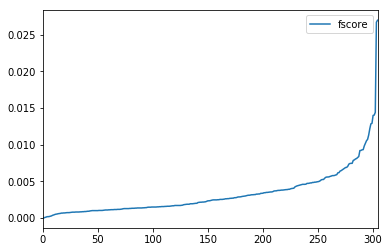

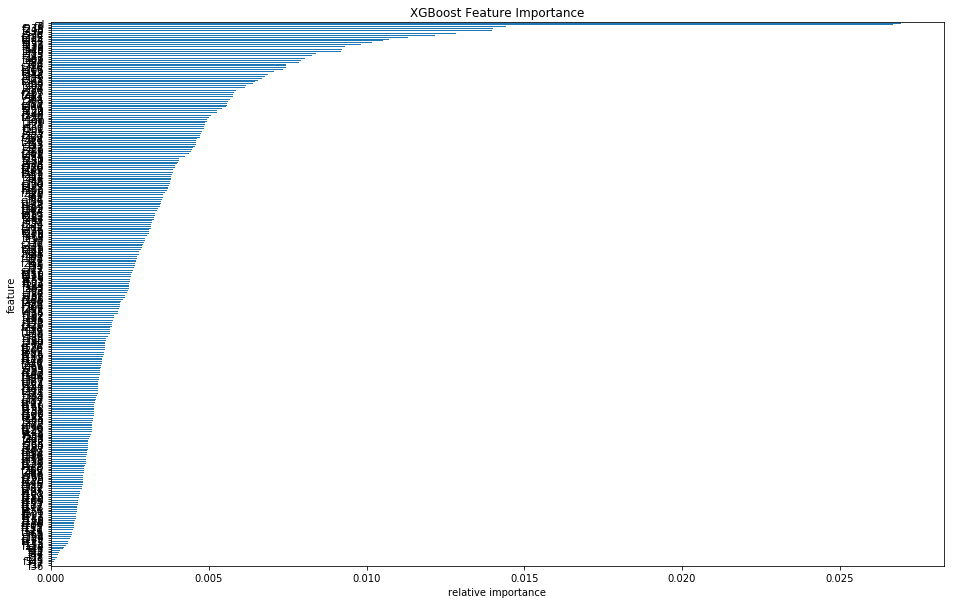

In [13]:
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

In [14]:
df=df.sort_values(by='fscore',ascending=False).reset_index()
ss=df.loc[:,'feature']
s=np.array(ss).tolist()
print (s)

['d', 'f7', 'f238', 'f248', 'f210', 'f6', 'f234', 'f82', 'f215', 'f244', 'f237', 'f253', 'f235', 'f236', 'f218', 'f245', 'f85', 'f15', 'f247', 'f243', 'f209', 'f84', 'f86', 'f14', 'f216', 'f18', 'f106', 'f252', 'f242', 'f246', 'f17', 'f5', 'f262', 'f208', 'f83', 'f207', 'f4', 'f30', 'f263', 'f222', 'f217', 'f81', 'f34', 'f204', 'f19', 'f52', 'f266', 'f241', 'f230', 'f220', 'f164', 'f240', 'f225', 'f29', 'm', 'f105', 'f31', 'f28', 'f5_0', 'f101', 'f205', 'y', 'f233', 'f27', 'f259', 'f25', 'f229', 'f53', 'f33', 'f232', 'f11', 'f260', 'f58', 'f261', 'f54', 'f249', 'f250', 'f231', 'f104', 'f48', 'f226', 'f239', 'f265', 'f185', 'f251', 'f55', 'f214', 'f57', 'f49', 'f50', 'f100', 'f279', 'f206', 'f223', 'f26', 'f221', 'f80', 'f51', 'f63', 'f56', 'f175', 'f192', 'f163', 'f23', 'f161', 'f184', 'f35', 'f219', 'f282', 'f284', 'f287', 'f32', 'f224', 'f162', 'f9', 'f16', 'f227', 'f290', 'f278', 'f264', 'f213', 'f13', 'f8', 'f1', 'f271', 'f79', 'f291', 'f270', 'f91', 'f286', 'f97', 'f24', 'f165', '